In [1]:
import os
import os.path as op
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

# 9 classifiers

### Load data

In [21]:
root = Path('../data/bids/derivatives/decoding/')
df = pd.DataFrame()
for file in root.rglob("*/*"):
    if 'target' in str(file):
        continue
    cond = re.findall('wavelet_(\d{1,2})', file.name)[0]
    sub = re.findall('sub-(\d{1,2})', file.name)[0]
    d = np.load(file)
    data_dict = {
                 'cond': [cond]*917,
                 'sub': [sub]*917,
                 'accuracies': d,
                }
    sub_df = pd.DataFrame.from_dict(data_dict)
    df = pd.concat([df, sub_df], ignore_index = False)
df

,cond,sub,accuracies
0,31,7,0.507371
1,31,7,0.508795
2,31,7,0.511024
3,31,7,0.512200
4,31,7,0.514281
...,...,...,...
912,32,29,0.495005
913,32,29,0.492443
914,32,29,0.491275
915,32,29,0.491018


<AxesSubplot:xlabel='index', ylabel='accuracies'>

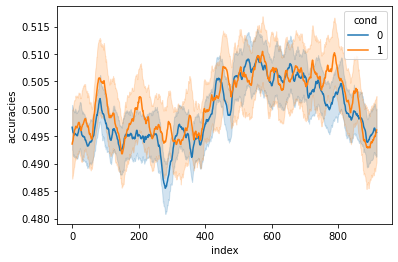

In [17]:
df_sns = df.reset_index()
df_sns = df_sns.replace({'11': 1,
                 '22': 1,
                 '33': 1,
                 '12': 0,
                 '13': 0,
                 '21': 0,
                 '23': 0,
                 '31': 0,
                 '32': 0,
                })

sns.lineplot(data = df_sns, x = "index", y = "accuracies", hue = "cond")

# 1 Classifier

Clearly not the direction to go in

### Load data

In [103]:
root = Path('../data/bids/derivatives/decoding/')
df = {}
for file in root.rglob("*/*"):
    if 'target' not in str(file):
        continue
    sub = re.findall('sub-(\d{1,2})', file.name)[0]
    d = np.load(file)
    df[sub] = d
df = pd.DataFrame.from_dict(df)

In [105]:
df_sns = df.copy()
subs = list(df_sns.columns)
subs = ['sub-' + str(s) for s in subs]
df_sns.columns = subs
df_sns = df_sns.reset_index()
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()
df_sns

,index,sub,accuracy
0,0,7,0.494037
1,1,7,0.493286
2,2,7,0.493398
3,3,7,0.494458
4,4,7,0.495473
...,...,...,...
23837,912,29,0.508244
23838,913,29,0.506930
23839,914,29,0.506501
23840,915,29,0.506320


<AxesSubplot:xlabel='index', ylabel='accuracy'>

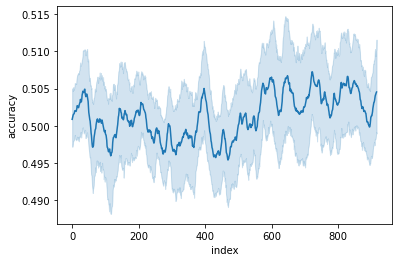

In [106]:
sns.lineplot(data = df_sns, x = "index", y = "accuracy")